In [3]:
#####Set librairies
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score
from sklearn.metrics import f1_score, confusion_matrix, precision_recall_curve, roc_curve
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import MeanShift
from sklearn.cluster import estimate_bandwidth

In [4]:
#####import data and data arrangement and data pre-processing
data = pd.read_csv('result_summ.csv')
data1 = data.transpose()
data_df = pd.DataFrame(data1.iloc[:])
data_df = pd.DataFrame(data_df.iloc[:], columns = ["20%","40%", "60%", "80%", "100%", "delta_20_60", "delta_60_100" ], )
data_df["20%"] = data1.iloc[:,0].values
data_df["40%"] = data1.iloc[:,1].values
data_df["60%"] = data1.iloc[:,2].values
data_df["80%"] = data1.iloc[:,3].values
data_df["100%"] = data1.iloc[:,4].values
data_df["delta_20_60"] = data1.iloc[:,5].values
data_df["delta_60_100"] = data1.iloc[:,6].values
data_df
data_delta = data_df.iloc[:, 5:7]
data_delta = data_df.iloc[:, 5:7]
X_features = data_delta[['delta_20_60','delta_60_100']].values
X_features_scaled = StandardScaler().fit_transform(X_features)
data_delta_scaled = pd.DataFrame(X_features_scaled, index = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33-1,33-2,33-3,34,35,36,37,38,39,40,
     41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56-1,56-2,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,
     80,81,82,83,84], columns = ['delta_20_60','delta_60_100'])
data_delta_scaled_size_ratio = pd.read_csv('data_delta_scaled_size_ratio.csv')
data_delta_scaled_size_ratio.head()
data_delta_scaled_size_ratio['R'].head()

0    2200.0
1      26.3
2      30.0
3    1150.0
4      15.0
Name: R, dtype: float64

In [5]:
#####estimate best_bandwidth of Meanshift clustering
x=data_delta_scaled['delta_20_60'].values
y=data_delta_scaled['delta_60_100'].values
data_delta_scaled = pd.DataFrame(X_features_scaled, columns = ['delta_20_60','delta_60_100'])
X_features = data_delta_scaled[['delta_20_60','delta_60_100']].values

best_bandwidth = estimate_bandwidth(X_features, quantile = 0.25)
print(best_bandwidth)

meanshift = MeanShift(bandwidth = best_bandwidth)
cluster_labels = meanshift.fit_predict(X_features)
print(np.unique(cluster_labels))

data_delta_scaled['clust_label'] = cluster_labels
data_delta_scaled_size_ratio['clust_label'] = cluster_labels
print(data_delta_scaled.head())

print(data_delta_scaled['clust_label'].value_counts())
print(data_delta_scaled.loc[data_delta_scaled['clust_label'] == 4])
print(data_delta_scaled.loc[data_delta_scaled['clust_label'] == 3])
data_delta_scaled.drop([2,59,38], axis=0, inplace=True)
data_delta_scaled.head()

0.942021773355324
[0 1 2 3 4]
   delta_20_60  delta_60_100  clust_label
0     1.031010      2.514073            2
1    -0.410802     -0.137388            0
2    -2.225294     -0.490802            4
3     0.329982      1.839871            2
4    -0.152960     -1.244178            0
0    53
1    17
2    14
4     2
3     1
Name: clust_label, dtype: int64
    delta_20_60  delta_60_100  clust_label
2     -2.225294     -0.490802            4
59    -2.239505     -1.502988            4
    delta_20_60  delta_60_100  clust_label
38    -1.199806     -3.184215            3


,delta_20_60,delta_60_100,clust_label
0,1.031010,2.514073,2
1,-0.410802,-0.137388,0
3,0.329982,1.839871,2
4,-0.152960,-1.244178,0
5,-0.528865,-0.153630,0


In [6]:
#####Data Split (training data sets, testing data sets)
X_features = data_delta_scaled.iloc[:, :-1]
y_labels = data_delta_scaled.iloc[:, -1]
X_train, X_test, y_train, y_test = train_test_split(X_features, y_labels,
                                                    test_size = 0.1, stratify = y_labels)

train_cnt = y_train.count()
test_cnt = y_test.count()
print('train shape:', train_cnt)
print('test shape:', test_cnt)

print('ratio for each label value in training set')
print(y_train.value_counts()/train_cnt)
print('ratio for each label value in testing set')
print(y_test.value_counts()/test_cnt)

train shape: 75
test shape: 9
train 세트의 레이블 값 분포 비율
0    0.626667
1    0.200000
2    0.173333
Name: clust_label, dtype: float64

 테스트 세트 레이블 값 분포 비율
0    0.666667
1    0.222222
2    0.111111
Name: clust_label, dtype: float64


In [17]:
#####Define command evaluating model
def get_clf_eval(y_test, pred = None, pred_proba = None):
    confusion = confusion_matrix(y_test, pred)
    accuracy = accuracy_score(y_test, pred)
    precision = precision_score(y_test, pred, average = 'micro')
    recall  = recall_score(y_test, pred, average = 'micro')
    f1 = f1_score(y_test, pred, average = 'micro')
    print('accuracy: {0:.4f}'.format(accuracy))

In [18]:
#####Training data
from sklearn.tree import DecisionTreeClassifier

dt_clf = DecisionTreeClassifier()

dt_clf.fit(X_train, y_train)

pred = dt_clf.predict(X_test)
pred_proba = dt_clf.predict_proba(X_test)[:,1]

get_clf_eval(y_test, pred, pred_proba)
print(y_test)
print(pred)

accuracy: 1.0000
69    0
75    1
34    0
60    0
4     0
15    2
47    1
76    0
58    0
Name: clust_label, dtype: int64
[0 1 0 0 0 2 1 0 0]


In [19]:
#####Trained model validation (cross validation)
from sklearn.metrics import make_scorer, accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score, cross_validate
scores = cross_val_score(dt_clf, X_features, y_labels, scoring = 'accuracy', cv = 10)
print('Cross validation accuracy:', np.round(scores, 4))
print('average accuracy:', np.round(np.mean(scores),4))

Cross validation accuracy: [0.7778 1.     1.     0.8889 1.     0.875  0.875  0.875  0.875  1.    ]
average accuracy: 0.9167


In [20]:
#####Defining feature and target names
data_delta_scaled.columns
data_delta_scaled.feature_names = ['delta_20_60', 'delta_60_100']
data_delta_scaled.target_names = ['group1', 'group2', 'group3']
data_delta_scaled.feature_names

['delta_20_60', 'delta_60_100']

In [21]:
#Visualizing trained tree model -1
from sklearn.tree import export_graphviz

export_graphviz(dt_clf, out_file = "tree.dot", class_names = data_delta_scaled.target_names, 
                feature_names = data_delta_scaled.feature_names, impurity = True, filled = True)

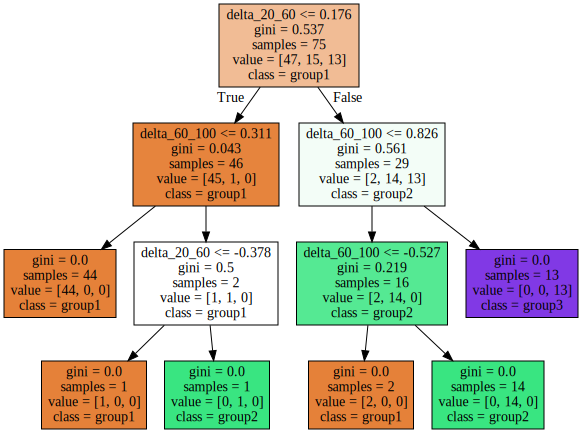

In [22]:
#Visualizing trained tree model -2
import graphviz

with open("tree.dot") as f:
    dot_graph = f.read()
graphviz.Source(dot_graph)